In [1]:
from dotenv import load_dotenv
import os
load_dotenv()

True

In [2]:
GEMINI_API_KEY = os.getenv("GEMINI_API_KEY")

In [3]:
if not GEMINI_API_KEY:
    raise ValueError ("API_KEY is missing your .env file")
os.environ["GEMINI_API_KEY"] = GEMINI_API_KEY

In [4]:
from langchain_google_genai import ChatGoogleGenerativeAI

In [5]:
chat_llm = ChatGoogleGenerativeAI(model="gemini-2.5-flash-lite")

In [6]:
chat_llm.invoke("Hello, How are you?").content

'Hello! I am a large language model, trained by Google. I am functioning as expected. How can I help you today?'

In [7]:
from typing_extensions import TypedDict, Annotated
import operator

In [8]:
from langchain_core.messages import AnyMessage, HumanMessage, AIMessage

In [9]:
class GraphState(TypedDict):
    messages: Annotated[list[AnyMessage], operator.add]
# u can add many number of messages in a list. For Eg: ["Hi", "How are you?"]

In [ ]:
{
    "messages": [HumanMessage(content="Hi, This is Sharan. Say hello in a detail.")]
}

{'messages': [HumanMessage(content='Hi, this is Sharan. Say hello in a detail.', additional_kwargs={}, response_metadata={})]}

In [11]:
def llm_call(state:GraphState) -> dict:
    """Call the llm using conversation messages and append AI response"""
    response = chat_llm.invoke(state["messages"])
    return {"messages": [response]}

In [12]:
def token_counter(state:GraphState) -> dict:
    """Count tokens (simple word count) in the last AI message."""
    last_msg = state["messages"][-1]
    text = last_msg.content
    token_number = len(text.split())
    Summary = f"Total token number in the generated answer (word count) is {token_number}"
    return {"messages": [AIMessage(content=Summary)]}

In [13]:
from langgraph.graph import StateGraph

In [14]:
builder = StateGraph(GraphState)

In [15]:
builder.add_node("llm_call", llm_call)
builder.add_node("token_counter", token_counter)

In [16]:
builder.set_entry_point("llm_call")
builder.add_edge("llm_call", "token_counter")
builder.set_finish_point("token_counter")

In [17]:
app = builder.compile()

In [18]:
app.get_graph()

Graph(nodes={'__start__': Node(id='__start__', name='__start__', data=RunnableCallable(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'llm_call': Node(id='llm_call', name='llm_call', data=llm_call(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), 'token_counter': Node(id='token_counter', name='token_counter', data=token_counter(tags=None, recurse=True, explode_args=False, func_accepts={}), metadata=None), '__end__': Node(id='__end__', name='__end__', data=None, metadata=None)}, edges=[Edge(source='__start__', target='llm_call', data=None, conditional=False), Edge(source='llm_call', target='token_counter', data=None, conditional=False), Edge(source='token_counter', target='__end__', data=None, conditional=False)])

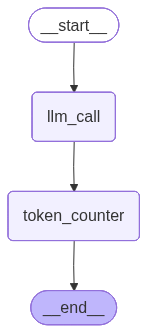

In [19]:
from IPython.core.display import Image
display(Image(app.get_graph().draw_mermaid_png()))

In [ ]:
# Call this above graph flow
result = app.invoke({"messages": [HumanMessage(content="Hi, This is Sharan. Say hello in a detail.")]})

In [21]:
result

{'messages': [HumanMessage(content='Hi, this is Sharan. Say hello in a detail.', additional_kwargs={}, response_metadata={}),
  AIMessage(content="Hello Sharan! It's a pleasure to make your acquaintance.\n\nAs a large language model, I don't have the capacity for personal greetings in the way a human does, but I can certainly offer a detailed and warm welcome.\n\nConsider this a digital handshake, a virtual nod of acknowledgment, and an open invitation to engage. I am here, ready to process your requests, answer your questions, generate text, and assist you in any way my capabilities allow.\n\nSo, **hello Sharan!** I hope you're having a good day. I'm excited to see what we can explore or accomplish together. What's on your mind today?", additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash-lite', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019c64d0-a75a-7690-ad0c-69550175df77-0', tool_calls=[], invalid_tool_calls=[],

In [22]:
for i in result["messages"]:
    print(type(i).__name__, ":", i.content)

HumanMessage : Hi, this is Sharan. Say hello in a detail.
AIMessage : Hello Sharan! It's a pleasure to make your acquaintance.

As a large language model, I don't have the capacity for personal greetings in the way a human does, but I can certainly offer a detailed and warm welcome.

Consider this a digital handshake, a virtual nod of acknowledgment, and an open invitation to engage. I am here, ready to process your requests, answer your questions, generate text, and assist you in any way my capabilities allow.

So, **hello Sharan!** I hope you're having a good day. I'm excited to see what we can explore or accomplish together. What's on your mind today?
AIMessage : Total token number in the generated answer (word count) is 102


In [23]:
chat_llm

ChatGoogleGenerativeAI(profile={'max_input_tokens': 1048576, 'max_output_tokens': 65536, 'image_inputs': True, 'audio_inputs': True, 'pdf_inputs': True, 'video_inputs': True, 'image_outputs': False, 'audio_outputs': False, 'video_outputs': False, 'reasoning_output': True, 'tool_calling': True, 'structured_output': True, 'image_url_inputs': True, 'image_tool_message': True, 'tool_choice': True}, google_api_key=SecretStr('**********'), model='gemini-2.5-flash-lite', client=<google.genai.client.Client object at 0x00000219288B3BF0>, default_metadata=(), model_kwargs={})

### WikiPedia Tool

In [24]:
from langchain_community.tools import WikipediaQueryRun
from langchain_community.utilities import WikipediaAPIWrapper

In [25]:
api_wrapper = WikipediaAPIWrapper(top_k_results=5, doc_content_chars_max=500)

In [26]:
wiki_tool = WikipediaQueryRun(api_wrapper=api_wrapper)

In [28]:
wiki_tool.run({"query": "what is Generative AI?"})

'Page: Generative artificial intelligence\nSummary: Generative artificial intelligence, also known as generative AI or GenAI, is a subfield of artificial intelligence that uses generative models to generate text, images, videos, audio, software code or other forms of data. These models learn the underlying patterns and structures of their training data, and use them to generate new data in response to input, which often takes the form of natural language prompts.\nThe prevalence of generative AI to'

##### What is Tool?: Its any service or application that can be used to perform a specific task.

##### What is Agent? : It is a program that can use tools to perform a specific task.

##### Agentic Flow = LLM + Tool Calling + Memory + Planning


### Tavily Tool

In [50]:
import os
from langchain_community.tools.tavily_search import TavilySearchResults
TAVILY_API_KEY = os.getenv("TAVILY_API_KEY")

In [51]:
if not TAVILY_API_KEY:
    raise ValueError ("API_KEY is missing your .env file")
os.environ["TAVILY_API_KEY"] = TAVILY_API_KEY

In [52]:
TAVILY_API_KEY

'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'

In [53]:
tavily_tool = TavilySearchResults(TAVILY_API_KEY=TAVILY_API_KEY)

In [55]:
tavily_tool.invoke({"query": "How is the job market for software engineers in 2026?"})

[{'title': 'Software Engineering Job Market Outlook for 2026 - Final Round AI',
  'url': 'https://www.finalroundai.com/blog/software-engineering-job-market-2026',
  'content': "## Bottom Line\n\nSo, is pursuing a career in software engineering still a smart move in 2026? Breaking into the field is harder than it was a few years ago, and you are competing with more people for fewer entry-level positions.\n\nBut the financial case is still strong. Software engineers still make significantly more than most other careers. The median salary for a software engineer in the US in 2026 is $130,000.\n\nNow, to get the right job, you need to continuously level up your skills. If you genuinely enjoy problem-solving, this is a great career.\n\nBuild projects. Network with people in the industry. That’s the open secret to getting a job in 2026.\n\nDevelop expertise in valuable areas rather than being a generalist who's mediocre at everything. [...] The US Bureau of Labor Statistics still expects sof

### DuckDuckGo Search Tool

In [56]:
from langchain_community.tools import DuckDuckGoSearchResults
duckgo_search = DuckDuckGoSearchResults()

In [58]:
duckgo_search.invoke("What is the news for iphone 17 release date?")

'snippet: iPhone 17 features the innovative Center Stage front camera, a bigger and brighter new display with ProMotion, and the A19 chip for improved performance. Two iPhone 17 devices, highlighting the front and back of each., title: Apple debuts iPhone 17 - Apple, link: https://www.apple.com/newsroom/2025/09/apple-debuts-iphone-17/, snippet: Apple iPhone 17 Pro Release Date Latest News : What To Expect When And Where. 3 Sept. iPhone 17 release date : Here’s when Apple’s new flagship will arrive., title: Google News - News about iPhone 17 • Apple - Overview, link: https://news.google.com/stories/CAAqNggKIjBDQklTSGpvSmMzUnZjbmt0TXpZd1NoRUtEd2lOOU9hbkR4SFJvS21hY2ZVdXVDZ0FQAQ?hl=en-IN&gl=IN&ceid=IN:en, snippet: The iPhone 17 was just released in September 2025, and now is a good time to buy. A new model is not expected until early 2027, because Apple is changing its entry-level iPhone timing. There will be no new iPhone 18 in 2026, but there will be iPhone 18 Pro and iPhone Fold models.

### Serper Tool

In [ ]:
import os
import pprint
SERPER_API_KEY = "8b24e13b565da29db3818517c6c3b646023f7661"

In [69]:
if not SERPER_API_KEY:
    raise ValueError ("API_KEY is missing your .env file")
os.environ["TAVILY_API_KEY"] = SERPER_API_KEY

In [71]:
from langchain_community.utilities import GoogleSerperAPIWrapper

serper_tool = GoogleSerperAPIWrapper()

In [75]:
serper_tool.run("Who is Narendra Modi?")

"Narendra Damodardas Modi (born 17 September 1950) is an Indian politician who has served as the prime minister of India since 2014. Modi was the chief minister ... Mr. Modi is the third child born to Damodardas Modi and Hiraba Modi. Mr. Modi comes from a family of humble origins and modest means. Narendra Modi is the 14th prime minister of India. His Hindu nationalist policies and some of his economic reforms have proved controversial ... Experience · Prime Minister of India. Government of India. May 2014 - Present 11 years 10 months · Chief Minister of Gujarat. Government of Gujarat. Oct 2001 - ... The first ever Prime Minister to be born after Independence, Shri Modi has previously served as the Prime Minister of India from 2014 to 2019. 2001, Chief Minister of Gujarat; served four terms. Since May 2014, Prime Minister of India, becoming the first ever PM to be born after India attained ... Narendra Modi. 54109256 likes · 4526654 talking about this. Prime Minister of India. 100M fol

### Youtube Search Tool

In [76]:
from langchain_community.tools import YouTubeSearchTool

In [77]:
youtube_search_tool = YouTubeSearchTool()

In [80]:
youtube_search_tool.description

'search for youtube videos associated with a person. the input to this tool should be a comma separated list, the first part contains a person name and the second a number that is the maximum number of video results to return aka num_results. the second part is optional'

In [83]:
youtube_search_tool.run("Sharan,5")

"['https://www.youtube.com/watch?v=j-TOQyqbwRA&pp=ygUGU2hhcmFu', 'https://www.youtube.com/watch?v=7oDshjZzW98&pp=ygUGU2hhcmFu', 'https://www.youtube.com/watch?v=bxz4AdoK7Mw&pp=ygUGU2hhcmFu', 'https://www.youtube.com/watch?v=RNMI0uqz5-8&pp=ygUGU2hhcmFu', 'https://www.youtube.com/watch?v=3sYmIUtvabk&pp=ygUGU2hhcmFu']"

#### Tool Decorators - Custom Tool Creation

In [93]:
def multiply(a:int, b:int)->int:
    return a*b

In [94]:
multiply(2,5) # its a just function call

10

### Converting Custom Tool def function to Tool generator

In [95]:
from langchain.tools import tool

In [98]:
@tool
def multiply(a:int, b:int) -> int:
    """This tool Multiplies two numbers"""
    return a*b

In [100]:
multiply.invoke({"a": 2, "b": 3})

6

In [105]:
multiply.name

'multiply'

In [103]:
multiply.description

'This tool Multiplies two numbers'

In [106]:
multiply.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [101]:
@tool
def add(a:int, b:int) -> int:
    """This tool Add two numbers"""
    return a+b

In [102]:
add.invoke({"a": 2, "b": 3})

5

In [108]:
add.name

'add'

In [104]:
add.description

'This tool Add two numbers'

In [107]:
add.args

{'a': {'title': 'A', 'type': 'integer'},
 'b': {'title': 'B', 'type': 'integer'}}

In [111]:
@tool
def get_word_length(word:str) -> int:
    """It is a tool to count the length of the word"""
    return len(word)

In [116]:
get_word_length.invoke("Hello How are you") # Either this or the next line

17

In [117]:
get_word_length.invoke({"word":"Hello How are you"})

17

In [ ]:
@tool
def call_gmail_api(args):
    """This is a tool to call Gmail API"""
    pass

In [114]:
@tool
def call_sqlite_db(args):
    """This is a tool to call Sqllite DB"""
    pass

### To Excess Real time data

In [118]:
import yfinance as yf

In [119]:
@tool
def get_stock_price(ticker: str) -> str:
    """This is a tool to get stock price using Yfinance"""
    try:
        stock = yf.Ticker(ticker)

        # Get last 1 day historical data
        data = stock.history(period="1d")

        if data.empty:
            return f"No data found for {ticker}. Please check the symbol"
        latest_close = data['Close'].iloc[-1]

        # Detect Currency
        currency = stock.info.get("currency", "")
        symbol_map = {
            "INR": "₹",
            "USD": "$",
            "EUR": "€",
            "GBP": "£",
            "JPY": "¥"
        }
        symbol = symbol_map.get(currency, "")
        currency_text = currency if currency else ""

        if symbol:
            return f"The last closing price of {ticker.upper()} was {symbol}{latest_close:.2f}."
        else:
            return f"The last closing price of {ticker.upper()} was {latest_close:.2f} {currency_text}."

    except Exception as e:
        return f"An error occurred while fetching stock data: {str(e)}"

In [122]:
get_stock_price.invoke("TSLA")

'The last closing price of TSLA was $417.44.'

In [126]:
get_stock_price.invoke("TCS.NS")

'The last closing price of TCS.NS was ₹2688.10.'

In [123]:
get_stock_price.invoke("AAPL")

'The last closing price of AAPL was $255.78.'

In [124]:
get_stock_price.invoke("HDFCBANK.NS")

'The last closing price of HDFCBANK.NS was ₹925.80.'